In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Customer.csv') #lokasi file csv
df.head(10)
#df.info()

,IDPelanggan,Kelamin,Usia,Rating_belanja (1-100),Pendapatan (juta Rp)
0,1,Perempuan,23,87,29
1,2,Laki,60,4,30
2,3,Perempuan,21,73,30
3,4,Laki,53,4,33
4,5,Laki,18,92,33
5,6,Perempuan,49,14,33
6,7,Perempuan,21,81,33
7,8,Perempuan,42,17,34
8,9,Perempuan,30,73,34
9,10,Perempuan,36,26,37


In [ ]:
# Mengimpor dataset
dataset = pd.read_csv('Customer.csv')
X = dataset.iloc[:,2:5].values
X[:5]

array([[23, 87, 29],
       [60,  4, 30],
       [21, 73, 30],
       [53,  4, 33],
       [18, 92, 33]])

<h2>Metode Elbow untuk menentukan Jumlah Cluster

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

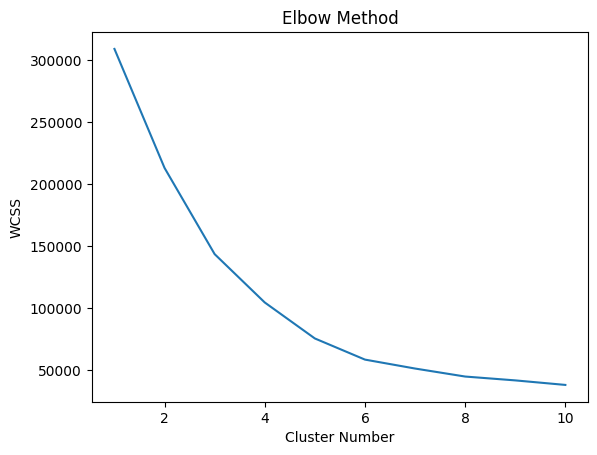

In [ ]:
# Menggunakan metode elbow untuk menentukan angka cluster yang tepat
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Cluster Number')
plt.ylabel('WCSS')
plt.show()

<h1>k-Means Clustering

<h2>Menjadi 3 Cluster

In [ ]:
# Menjalankan K-Means Clustering ke dataset dengan 3 cluster

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

dataset['t_cluster'] = y_kmeans + 1
dataset.head(5)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,IDPelanggan,Kelamin,Usia,Rating_belanja (1-100),Pendapatan (juta Rp),t_cluster
0,1,Perempuan,23,87,29,2
1,2,Laki,60,4,30,2
2,3,Perempuan,21,73,30,2
3,4,Laki,53,4,33,2
4,5,Laki,18,92,33,2


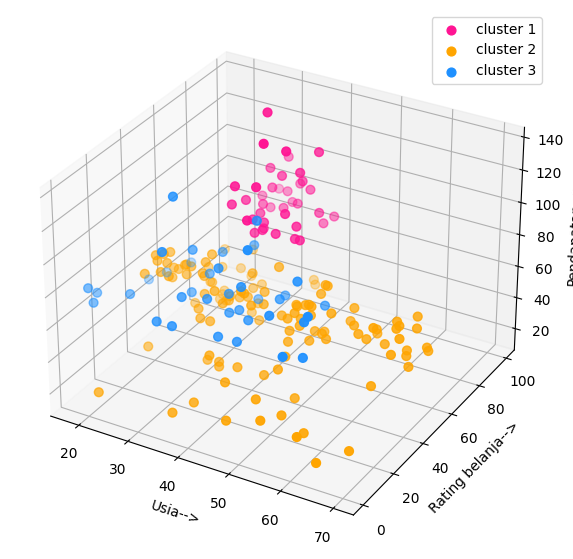

In [ ]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[y_kmeans == 0,0],X[y_kmeans == 0,1],X[y_kmeans == 0,2], s = 40 , color = 'deeppink', label = "cluster 1")
ax.scatter(X[y_kmeans == 1,0],X[y_kmeans == 1,1],X[y_kmeans == 1,2], s = 40 , color = 'orange', label = "cluster 2")
ax.scatter(X[y_kmeans == 2,0],X[y_kmeans == 2,1],X[y_kmeans == 2,2], s = 40 , color = 'dodgerblue', label = "cluster 3")
ax.set_xlabel('Usia-->')
ax.set_ylabel('Rating belanja-->')
ax.set_zlabel('Pendapatan-->')
ax.legend()
plt.show()

<h1>Karakter Setiap Cluster

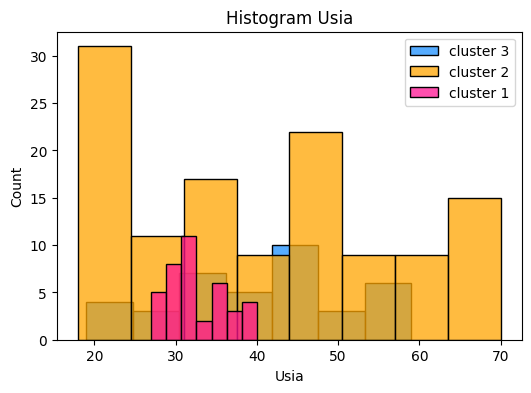

In [ ]:
sumbuX="Usia"

plt.subplots(figsize=(6,4), dpi=100)
sns.histplot( dataset.loc[dataset.t_cluster==3,sumbuX] , color="dodgerblue", label="cluster 3")
sns.histplot( dataset.loc[dataset.t_cluster==2,sumbuX] , color="orange", label="cluster 2")
sns.histplot( dataset.loc[dataset.t_cluster==1,sumbuX] , color="deeppink", label="cluster 1")

plt.title('Histogram '+sumbuX)
plt.legend();

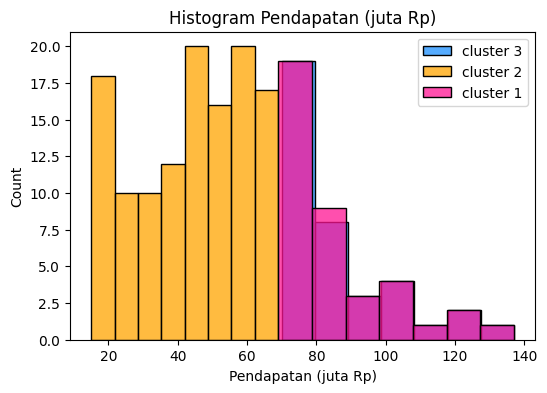

In [ ]:
sumbuX="Pendapatan (juta Rp)"

plt.subplots(figsize=(6,4), dpi=100)
sns.histplot( dataset.loc[dataset.t_cluster==3,sumbuX] , color="dodgerblue", label="cluster 3")
sns.histplot( dataset.loc[dataset.t_cluster==2,sumbuX] , color="orange", label="cluster 2")
sns.histplot( dataset.loc[dataset.t_cluster==1,sumbuX] , color="deeppink", label="cluster 1")

plt.title('Histogram '+sumbuX)
plt.legend();

<Axes: xlabel='t_cluster', ylabel='Count'>

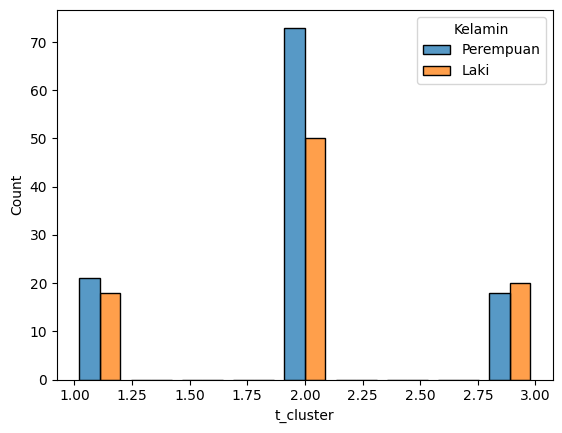

In [ ]:
sns.histplot(data=dataset, x="t_cluster", hue="Kelamin", multiple="dodge", shrink=.8)

<Axes: xlabel='Pendapatan (juta Rp)', ylabel='Count'>

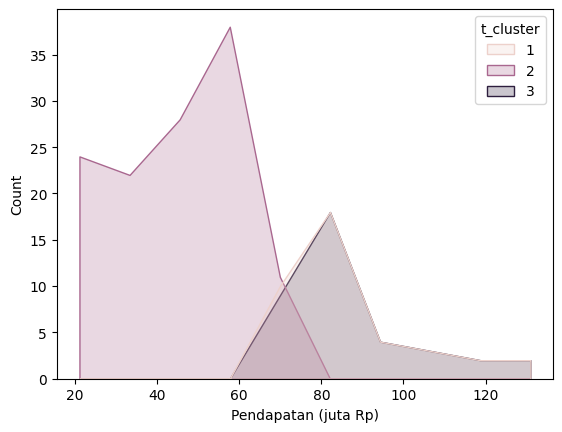

In [ ]:
sns.histplot(dataset, x="Pendapatan (juta Rp)", hue="t_cluster", element="poly")

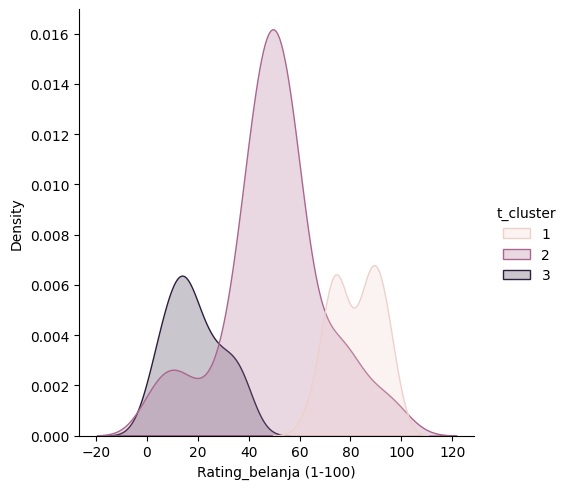

In [ ]:
sns.displot(dataset, x="Rating_belanja (1-100)", hue="t_cluster", kind="kde", fill=True)

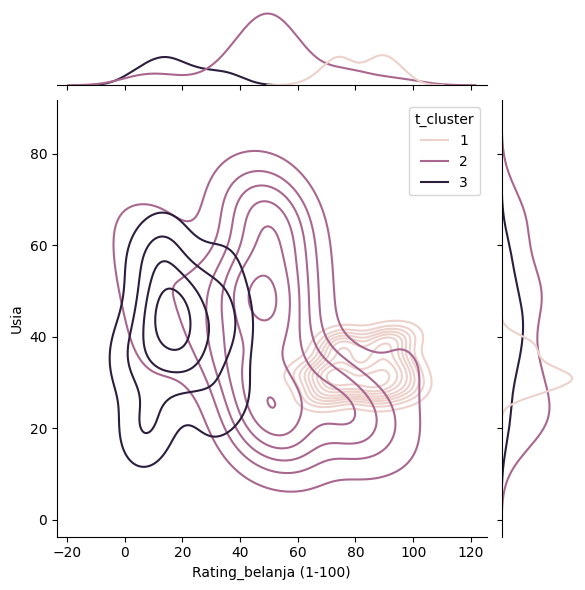

In [ ]:
sns.jointplot(
    data=dataset,
    x="Rating_belanja (1-100)", y="Usia", hue="t_cluster",
    kind="kde"
)

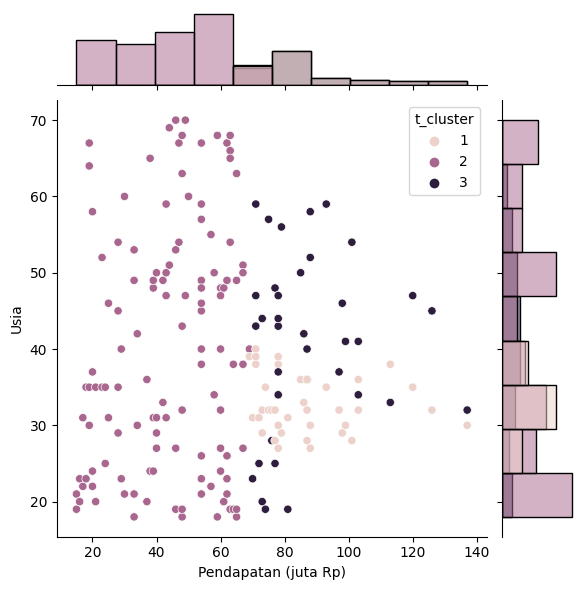

In [ ]:
g = sns.JointGrid(data=dataset, x="Pendapatan (juta Rp)", y="Usia", hue="t_cluster")
g.plot(sns.scatterplot, sns.histplot)

In [ ]:
centroids = kmeans.cluster_centers_
centroids

array([[32.69230769, 82.12820513, 86.53846154],
       [40.32520325, 49.82926829, 44.15447154],
       [40.39473684, 18.63157895, 87.        ]])